1. Data Download

In [3]:
import yfinance as yf

def download_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data.to_csv(f"../data/{ticker}.csv")
    return data

# Download NVDA and NVDQ data
nvda_data = download_stock_data("NVDA", "2020-01-01", "2024-11-26")
nvdq_data = download_stock_data("NVDQ", "2023-10-19", "2024-11-26")


/Users/rongfan/Documents/GitHub/SmartTrader/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [45]:
import yfinance as yf
from datetime import datetime

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Try downloading NVDA data
nvda_data = yf.download("NVDA", start=start, end=end)
print(nvda_data)


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            NVDA        NVDA        NVDA        NVDA        NVDA   
Date                                                                     
2023-12-04   45.496231   45.509998   46.077000   45.009998   46.077000   
2023-12-05   46.556007   46.566002   46.599998   45.271000   45.466000   
2023-12-06   45.493237   45.502998   47.387001   45.411999   47.215000   
2023-12-07   46.586002   46.596001   46.629002   45.604000   45.700001   
2023-12-08   47.495808   47.506001   47.741001   46.549999   46.595001   
...                ...         ...         ...         ...         ...   
2024-11-26  136.919998  136.919998  139.300003  135.669998  137.699997   
2024-11-27  135.339996  135.339996  137.220001  131.800003  135.009995   
2024-11-29  138.250000  138.250000  139.350006  136.050003  136.779999   
2024-12-02  138.630005  138.630005  140.449997  137.820007  138.830002   
2024-12-03  140.259995  140.259995  14

In [50]:
import yfinance as yf
from datetime import datetime

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Try downloading NVDA data
nvda_data = yf.download("NVDQ", start=start, end=end)
print(nvda_data)


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open    Volume
Ticker           NVDQ       NVDQ       NVDQ       NVDQ       NVDQ      NVDQ
Date                                                                       
2023-12-04  67.129745  74.730003  76.110001  73.230003  73.230003     10933
2023-12-05  64.133026  71.393997  74.430000  71.279999  74.400002      9367
2023-12-06  67.183640  74.790001  74.790001  68.760002  69.264000      7467
2023-12-07  63.734180  70.949997  74.610001  70.949997  74.610001      8233
2023-12-08  61.257576  68.193001  68.910004  67.650002  68.849998      4800
...               ...        ...        ...        ...        ...       ...
2024-11-26   3.440000   3.440000   3.500000   3.320000   3.400000  34899600
2024-11-27   3.520000   3.520000   3.690000   3.520000   3.535000  35882200
2024-11-29   3.365000   3.365000   3.482000   3.310000   3.440000  21203000
2024-12-02   3.355000   3.355000   3.390000   3.260000   3.350000  39320800
2024-12-03  

In [51]:
import pandas as pd
from datetime import datetime
import yfinance as yf

# Define stock list and date range
tech_list = ['NVDA', 'NVDQ']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Initialize list to store data
company_list = []

# Fetch data for each stock
for stock in tech_list:
    print(f"Fetching data for: {stock}")
    try:
        # Download stock data
        data = yf.download(stock, start=start, end=end)
        
        # If data is empty, log and skip
        if data.empty:
            print(f"No data found for {stock}, skipping.")
            continue

        # Add metadata columns
        data["company_name"] = stock
        data["Ticker"] = stock

        # Append the data to the list
        company_list.append(data)
        print(f"Data fetched successfully for {stock}: {data.shape[0]} rows")
    except Exception as e:
        print(f"Error fetching data for {stock}: {e}")

# Check if we have any data
if not company_list:
    print("No data was fetched. Exiting.")
else:
    # Concatenate all DataFrames
    try:
        df = pd.concat(company_list, axis=0)
        df.reset_index(inplace=True)  # Reset index for final DataFrame
        print("Final DataFrame shape:", df.shape)
        print(df.tail(10))  # Display the last 10 rows
    except Exception as e:
        print("Error concatenating DataFrames:", e)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for: NVDA
Data fetched successfully for NVDA: 252 rows
Fetching data for: NVDQ
Data fetched successfully for NVDQ: 252 rows
Final DataFrame shape: (504, 15)
Price        Date Adj Close Close High  Low Open Volume company_name Ticker  \
Ticker                 NVDA  NVDA NVDA NVDA NVDA   NVDA                       
494    2024-11-19       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
495    2024-11-20       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
496    2024-11-21       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
497    2024-11-22       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
498    2024-11-25       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
499    2024-11-26       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
500    2024-11-27       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
501    2024-11-29       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
502    2024-12-02       NaN   NaN  NaN 

In [46]:
tech_list = ['NVDA', 'NVDQ']
company_list = []

for stock in tech_list:
    print(f"Fetching data for: {stock}")
    try:
        data = yf.download(stock, start=start, end=end)
        if data.empty:
            print(f"No data found for: {stock}")
            continue
        data["company_name"] = stock
        data["Ticker"] = stock
        company_list.append(data)
    except Exception as e:
        print(f"Error fetching data for {stock}: {e}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for: NVDA
Fetching data for: NVDQ


In [47]:
for stock in tech_list:
    print(f"Fetching data for: {stock}")
    try:
        data = yf.download(stock, start=start, end=end)
        if data.empty:
            print(f"No data found for: {stock}")
            # Create a placeholder DataFrame for missing stock
            data = pd.DataFrame(columns=["Open", "High", "Low", "Close", "Adj Close", "Volume"])
            data["company_name"] = stock
            data["Ticker"] = stock
        else:
            data["company_name"] = stock
            data["Ticker"] = stock
        company_list.append(data)
    except Exception as e:
        print(f"Error fetching data for {stock}: {e}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for: NVDA
Fetching data for: NVDQ


In [57]:
df = pd.concat(company_list, axis=0)
df.reset_index(inplace=True)

# Display the combined DataFrame
print(df.tail(10))


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [44]:
import pandas as pd
from datetime import datetime
import yfinance as yf

# Define tech stocks and date range
tech_list = ['NVDA', 'NVDQ']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Initialize list for concatenation
company_list = []

# Download data for each stock and append with company name
for stock in tech_list:
    data = yf.download(stock, start=start, end=end)
    data["company_name"] = stock  # Add company name
    data["Ticker"] = stock        # Add ticker symbol for clarity
    company_list.append(data)

# Concatenate all dataframes into one
df = pd.concat(company_list, axis=0)

# Reset index to organize the final dataframe
df.reset_index(inplace=True)

# Display the last 10 rows of the combined dataframe
print(df.tail(10))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price        Date Adj Close Close High  Low Open Volume company_name Ticker  \
Ticker                 NVDA  NVDA NVDA NVDA NVDA   NVDA                       
494    2024-11-19       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
495    2024-11-20       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
496    2024-11-21       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
497    2024-11-22       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
498    2024-11-25       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
499    2024-11-26       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
500    2024-11-27       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
501    2024-11-29       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
502    2024-12-02       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   
503    2024-12-03       NaN   NaN  NaN  NaN  NaN    NaN         NVDQ   NVDQ   

Price  Adj Close  Close   High    Low   Open      V

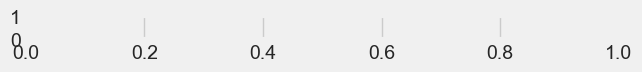

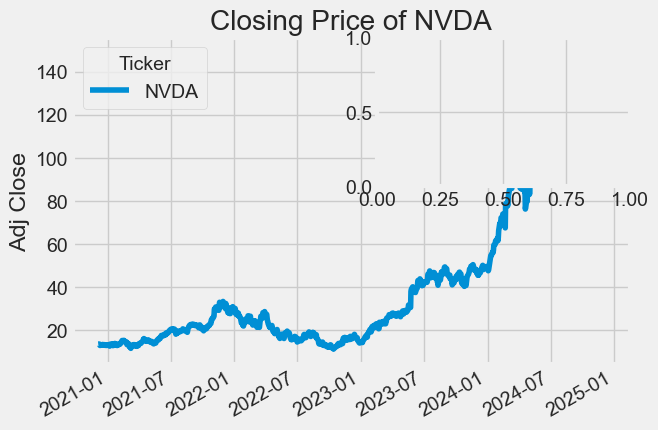

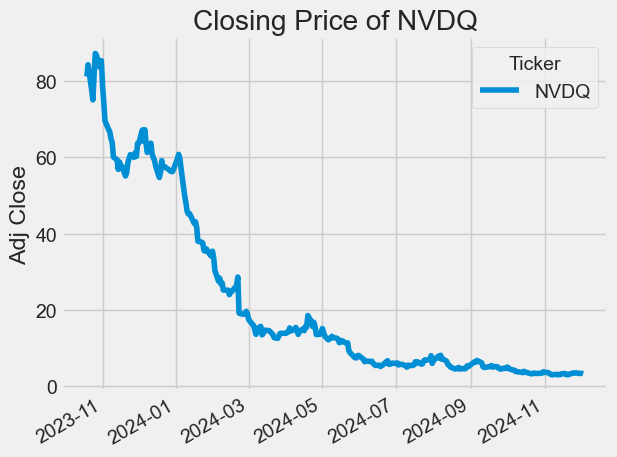

In [43]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

2. Data Exploration

In [78]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

# Define the file path
file_path = "../data/NVDA.csv"

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Load the file
try:
    nvda = pd.read_csv(file_path, parse_dates=True)
    print(nvda.head())
except ValueError as e:
    print(f"Error reading the file: {e}")
    print("Inspect the column names in the file.")


        Price          Adj Close               Close                High  \
0      Ticker               NVDA                NVDA                NVDA   
1        Date                NaN                 NaN                 NaN   
2  2020-01-02  5.973121643066406  5.9977498054504395  5.9977498054504395   
3  2020-01-03  5.877516746520996   5.901750087738037  5.9457502365112305   
4  2020-01-06   5.90216588973999   5.926499843597412  5.9317498207092285   

                 Low               Open     Volume  
0               NVDA               NVDA       NVDA  
1                NaN                NaN        NaN  
2  5.918000221252441            5.96875  237536000  
3  5.852499961853027  5.877500057220459  205384000  
4  5.781750202178955  5.808000087738037  262636000  


In [84]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

# Define the file path
file_path = "../data/NVDA.csv"

# Check if the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Load the file
try:
    # Define column names
    columns = ["Date", "Adj Close", "Close", "High", "Low", "Open", "Volume"]
    
    # Load data, skipping the first two rows
    nvda = pd.read_csv(file_path, skiprows=2, names=columns, parse_dates=["Date"])
    
    # Convert numeric columns
    numeric_columns = ["Adj Close", "Close", "High", "Low", "Open", "Volume"]
    nvda[numeric_columns] = nvda[numeric_columns].apply(pd.to_numeric, errors="coerce")
    
    # Drop invalid rows
    nvda = nvda.dropna()

    print(nvda.head())

except ValueError as e:
    print(f"Error reading the file: {e}")
    print("Inspect the column names in the file.")


         Date  Adj Close    Close     High      Low     Open       Volume
1  2020-01-02   5.973122  5.99775  5.99775  5.91800  5.96875  237536000.0
2  2020-01-03   5.877517  5.90175  5.94575  5.85250  5.87750  205384000.0
3  2020-01-06   5.902166  5.92650  5.93175  5.78175  5.80800  262636000.0
4  2020-01-07   5.973620  5.99825  6.04425  5.90975  5.95500  314856000.0
5  2020-01-08   5.984823  6.00950  6.05100  5.95375  5.99400  277108000.0


/var/folders/94/zgrbt5954ys378xq4p1c7lm00000gn/T/ipykernel_3425/2031686047.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nvda = pd.read_csv(file_path, skiprows=2, names=columns, parse_dates=["Date"])


In [85]:
import joblib

# Save the scaler
joblib.dump(scaler, "models/scaler.pkl")


FileNotFoundError: [Errno 2] No such file or directory: 'models/scaler.pkl'

In [82]:
from sklearn.preprocessing import MinMaxScaler

# Define columns to normalize
columns_to_normalize = ["Close", "High", "Low", "Open", "Volume"]

# Initialize the scaler
scaler = MinMaxScaler()

# Apply the scaler to the relevant columns
nvda[columns_to_normalize] = scaler.fit_transform(nvda[columns_to_normalize])

# Print the normalized data
print(nvda.head())


         Date  Adj Close     Close      High       Low      Open    Volume
1  2020-01-02   5.973122  0.007555  0.005075  0.009884  0.006694  0.096576
2  2020-01-03   5.877517  0.006889  0.004723  0.009422  0.006062  0.074342
3  2020-01-06   5.902166  0.007060  0.004628  0.008923  0.005580  0.113934
4  2020-01-07   5.973620  0.007559  0.005390  0.009826  0.006599  0.150047
5  2020-01-08   5.984823  0.007637  0.005435  0.010136  0.006869  0.123942


In [87]:
nvda.describe()

,Adj Close,Close,High,Low,Open,Volume
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1.234000e+03
mean,36.528408,36.551799,37.232162,35.806822,36.553338,4.517318e+08
std,36.010173,36.003207,36.688308,35.280641,36.062382,1.860269e+08
min,4.892763,4.910000,5.248500,4.517000,5.002500,9.788400e+07
25%,13.511204,13.543375,13.825063,13.337188,13.585625,3.166110e+08
50%,20.693473,20.729000,21.085000,20.519500,20.840750,4.270230e+08
75%,44.633824,44.651001,45.298749,43.881250,44.550001,5.506938e+08
max,148.880005,148.880005,152.889999,146.259995,149.350006,1.543911e+09


In [90]:
nvda.tail()

,Date,Adj Close,Close,High,Low,Open,Volume
1230,2024-11-19,147.009995,147.009995,147.130005,140.990005,141.320007,227834900.0
1231,2024-11-20,145.889999,145.889999,147.559998,142.729996,147.410004,309871700.0
1232,2024-11-21,146.669998,146.669998,152.889999,140.699997,149.350006,400946600.0
1233,2024-11-22,141.949997,141.949997,147.160004,141.100006,145.929993,236406200.0
1234,2024-11-25,136.020004,136.020004,142.050003,135.820007,141.990005,344941900.0


3. Feature Engineering

In [60]:
def compute_rsi(prices, window=14):
    """
    Compute the Relative Strength Index (RSI) for a given window.
    
    Args:
        prices (pd.Series): A Pandas Series of closing prices.
        window (int): The number of periods to calculate RSI over (default: 14).
        
    Returns:
        pd.Series: RSI values.
    """
    # Calculate price changes
    delta = prices.diff()

    # Separate gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculate average gain and loss
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Compute the Relative Strength (RS)
    rs = avg_gain / avg_loss

    # Compute RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi

nvda['Close'] = pd.to_numeric(nvda['Close'], errors='coerce')
nvda = nvda.dropna(subset=['Close'])

# Add RSI
nvda['RSI'] = compute_rsi(nvda['Close'], window=14)

In [21]:
# Add moving averages
nvda['MA_5'] = nvda['Close'].rolling(window=5).mean()
nvda['MA_10'] = nvda['Close'].rolling(window=10).mean()


In [22]:
# Add lag features
for lag in range(1, 6):
    nvda[f'lag_{lag}'] = nvda['Close'].shift(lag)


In [ ]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

4. Prediction Targets

In [23]:
# Define prediction targets
nvda['High_5'] = nvda['High'].rolling(window=5).max().shift(-5)
nvda['Low_5'] = nvda['Low'].rolling(window=5).min().shift(-5)
nvda['Avg_Close_5'] = nvda['Close'].rolling(window=5).mean().shift(-5)


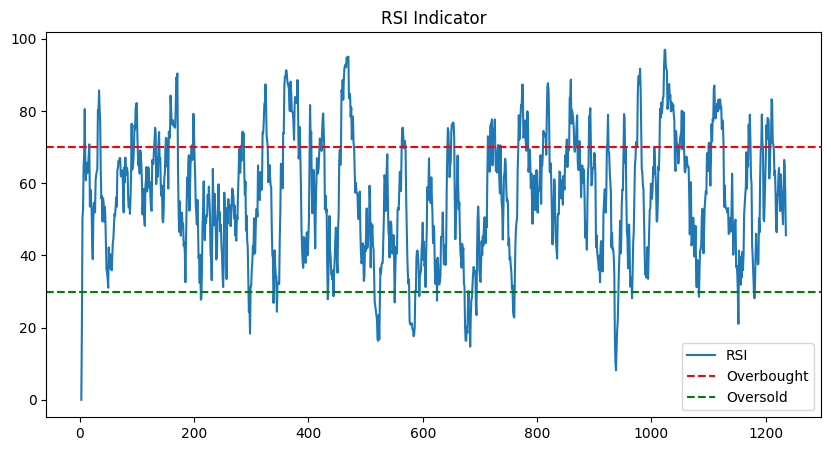

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(nvda.index, nvda['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('RSI Indicator')
plt.legend()
plt.show()


5. Baseline Linear Regression Model


In [24]:
from sklearn.model_selection import train_test_split

# Drop rows with NaN values
nvda = nvda.dropna()

# Define features and targets
features = [f'lag_{lag}' for lag in range(1, 6)]
target = 'Avg_Close_5'

X = nvda[features]
y = nvda[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
# Train the Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 7.552150669261265


6. Advanced Model: LSTM

In [26]:
# Prepare Sequential Data

import numpy as np

def create_sequences(data, sequence_length):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        targets.append(data[i+sequence_length])
    return np.array(sequences), np.array(targets)

sequence_length = 5
features = ['Close']
data = nvda[features].values

X, y = create_sequences(data, sequence_length)


In [61]:
# Define and Train LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape input data for LSTM
X = X.reshape((X.shape[0], X.shape[1], len(features)))

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, len(features))),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=200, batch_size=32, validation_split=0.2)


Epoch 1/200


/Users/rongfan/Documents/GitHub/SmartTrader/venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 520.6066 - val_loss: 9783.3828
Epoch 2/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 327.8925 - val_loss: 8865.9746
Epoch 3/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 236.2121 - val_loss: 8516.3867
Epoch 4/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 210.0164 - val_loss: 8249.6807
Epoch 5/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 173.1361 - val_loss: 8010.8062
Epoch 6/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 160.4409 - val_loss: 7820.6162
Epoch 7/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151.2922 - val_loss: 7658.8618
Epoch 8/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 143.4953 - val_loss: 7526.4023
Epoch 9/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 128.6777 - val_loss: 7418.4829
Epoch 10/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 136.3979 - val_loss: 7326.6494
Epoch 11/200
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 104.5200 - val_loss: 7175.4849
Epoch 12/200
31/31 ━

In [67]:
X.shape

(1215, 5, 1)